In [6]:
import pandas as pd
import os

fixes_df = pd.read_csv(os.path.join('..', 'fixes.csv'))
fixes_df['date'] = pd.to_datetime(fixes_df['date'], format='ISO8601', utc=True)
fixes_df

/tmp/ipykernel_867357/2734944423.py:4: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  fixes_df = pd.read_csv(os.path.join('..', 'fixes.csv'))


,hash,date,fixes_hash,fixes_date,fixes_commits,fixes_time
0,1da177e4c3,2005-04-16 22:20:36+00:00,NaN,NaN,NaN,NaN
1,8d38eadb7a,2005-04-16 22:23:53+00:00,NaN,NaN,NaN,NaN
2,baaa2c512d,2005-04-16 22:23:54+00:00,NaN,NaN,NaN,NaN
3,2d137c24e9,2005-04-16 22:23:55+00:00,NaN,NaN,NaN,NaN
4,7aa52f5128,2005-04-16 22:23:56+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1233416,784e0e20b4,2023-11-10 15:32:04+00:00,NaN,NaN,NaN,NaN
1233417,705fc522fe,2023-11-10 15:33:15+00:00,NaN,NaN,NaN,NaN
1233418,ee1d21794e,2023-11-10 15:33:19+00:00,NaN,NaN,NaN,NaN
1233419,fd2bd7c053,2023-11-10 15:33:26+00:00,NaN,NaN,NaN,NaN


date
2005    15860
2006    29446
2007    30566
2008    50903
2009    52545
2010    49635
2011    55112
2012    64959
2013    71351
2014    75951
2015    75424
2016    77134
2017    80857
2018    80414
2019    82545
2020    90448
2021    86112
2022    85823
2023    78336
Name: date, dtype: int64


<Axes: xlabel='date'>

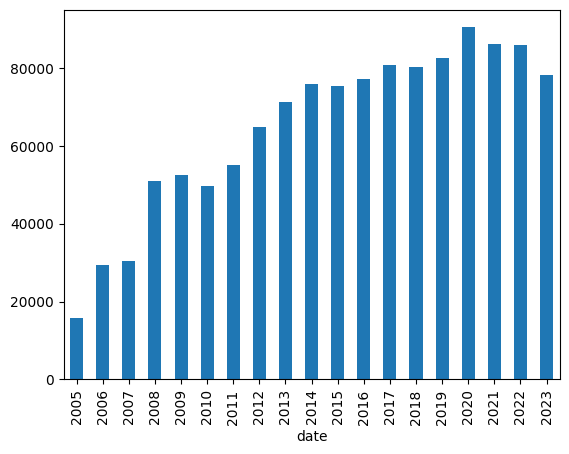

In [13]:
fixes_year = fixes_df['date'].groupby(fixes_df.date.dt.year).agg('count')
print(fixes_year)
fixes_year.plot(kind='bar')

In [54]:
fixesonly_df = fixes_df.dropna(subset=['fixes_hash'])
pd.options.mode.chained_assignment = None
fixesonly_df['year'] = fixesonly_df['date'].dt.year
fixesonly_year = fixesonly_df.groupby(['year'])['year'].agg('count')
fixesonly_year

year
2013      167
2014     1525
2015     3008
2016     5317
2017     8154
2018     9020
2019    11277
2020    12804
2021    13464
2022    14164
2023    11931
Name: year, dtype: int64

<Axes: xlabel='year'>

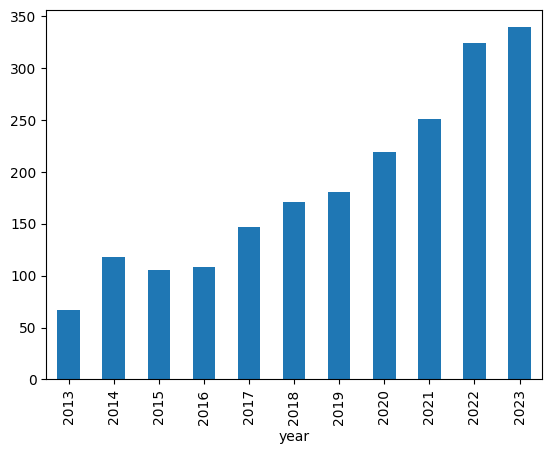

In [75]:
fixesonly_year_mean = fixesonly_df.groupby('year')['fixes_time'].agg('median').div(3600*24)
fixesonly_year_mean
fixesonly_year_mean.plot(kind='bar')

<Axes: xlabel='year'>

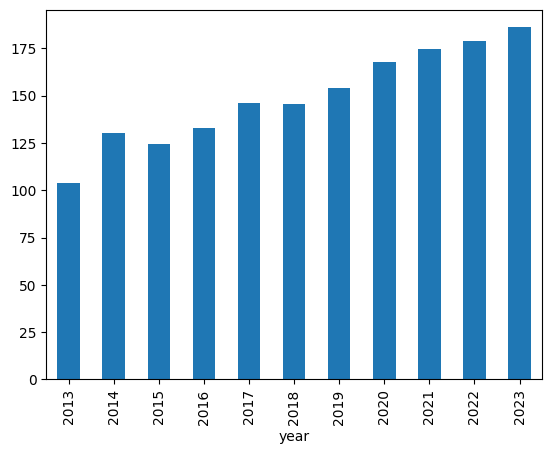

In [72]:
fixesonly_year_commits = fixesonly_df.groupby('year')['fixes_commits'].agg('mean')
fixesonly_year_commits
fixesonly_year_commits.plot(kind='bar')